In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gamma=0.9
psize=150
vsize=150

In [3]:
A=[-1,0,1]
velL=[-0.07,0.07]
posL=[-1.2,0.5]

In [4]:
def update(pos,vel,a):
    v=vel+0.001*a-0.0025*np.cos(3*pos)
    p=pos+vel
    v=min(velL[1],max(v,velL[0]))
    p=min(posL[1],max(p,posL[0]))
    
    return p,v

In [5]:
posUnit=(posL[1]-posL[0])/(psize-1)
velUnit=(velL[1]-velL[0])/(vsize-1)

In [6]:
def reward(p,v,a):
    if(p==posL[1]):
        return 100
    else:
        return -50

In [7]:
def repeat(TV,OP):
    for p in range(psize):
        for v in range(vsize):
            maxv=-10000
            a=0
            t=0
            for k in A:
                pos=posL[0]+(posUnit*p)
                vel=velL[0]+(velUnit*v)
                
                newP, newV=update(pos,vel,k)
                npi=(newP-posL[0])/(posUnit)
                nvi=(newV-velL[0])/(velUnit)
                npi=int(np.ceil(npi))
                nvi=int(np.ceil(nvi))
                
                t=reward(newP,newV,k)+gamma*(TV[npi][nvi])
                if(newP>pos):
                    t+=40
                
                if(maxv<t):
                    maxv=t
                    a=k
            TV[p][v]=maxv
            OP[p][v]=a
    return TV,OP

In [8]:
def Value_Iteration(it=500):
    TV=np.zeros((psize,vsize))
    OP=np.zeros((psize,vsize))
    for i in range(it):
        if(i%50==0):
            print("Iteration"+str(i))
        TV,OP=repeat(TV,OP)
    return TV,OP

In [ ]:
Value,Policy=Value_Iteration()

Iteration0
Iteration50
Iteration100
Iteration150
Iteration200


In [179]:
print(Value)

[[-440.67815793 -440.67815793 -440.67815793 ...   12.26388285
    12.26388285   12.26388285]
 [-440.67815793 -440.67815793 -440.67815793 ...   12.26388285
    12.26388285   12.26388285]
 [-440.67815793 -440.67815793 -440.67815793 ...   12.26388285
    12.26388285   12.26388285]
 ...
 [-489.0075429  -489.0075429  -489.0075429  ... 1040.
  1040.         1040.        ]
 [-489.0075429  -489.0075429  -490.10678861 ... 1040.
  1040.         1040.        ]
 [-490.10678861 -490.10678861 -490.10678861 ... 1000.
  1000.         1000.        ]]


In [180]:
print(Policy)

[[ 0. -1. -1. ... -1. -1. -1.]
 [ 0. -1. -1. ... -1. -1. -1.]
 [ 0. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


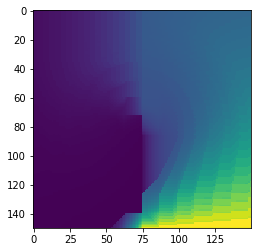

In [181]:
plt.imshow(Value)

In [109]:
np.savetxt("Value.txt",Value,fmt="%i")

In [110]:
np.savetxt("Policy.txt",Policy,fmt="%i")

In [182]:
ve=0.0387
po=0.3
while(po<posL[1]):
    vi=(ve-velL[0])/(velUnit)
    pi=(po-posL[0])/(posUnit)
    vi=int(np.ceil(vi))
    pi=int(np.ceil(pi))
    a=Policy[pi][vi]
    po,ve=update(po,ve,a)
    print(po,ve)

0.3387 0.036145975079323336
0.3748459750793233 0.03382926211952364
0.40867523719884696 0.03275027865493177
0.44142551585377876 0.03090532665506641
0.47233084250884516 0.02929525055841249
0.5 0.027912255235897285
